# Figure 12: Eempirical characterization of unit sphere-based pointcloud generated from the test datase

In [1]:
import os
os.chdir(f'{os.getcwd()}/../../')
WORKING_DIR = './evaluation/profile_networking'

In [2]:
import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
from datasets.xihe.loader import XiheTestDataset

import seaborn as sns
from matplotlib import pyplot as plt

sns.set(color_codes=True)

In [3]:
anchors_group = [512, 768, 1024, 1280, 1536, 1792, 2048]
df = pd.DataFrame(columns=['n_anchors', 'data_idx', 'empty_anchors'])

In [7]:
for n_anchors in anchors_group:
    dataset = XiheTestDataset(n_points=n_anchors)
    
    empty_count = np.zeros((len(dataset)), dtype=np.int)
    
    for i in tqdm(range(len(dataset))):
        x, y = dataset[i]
        rgb = x[1]
        empty_anchors = (rgb.sum(dim=0) > 0).sum().item()
        
        df.loc[len(df)] = [n_anchors, i, empty_anchors]

100%|██████████| 2037/2037 [00:04<00:00, 444.34it/s]


In [8]:
df['empty_anchors'] = df['empty_anchors'].astype(np.int)

In [9]:
df['non_empty_anchors'] = df['n_anchors'] - df['empty_anchors']

In [10]:
df['bytes_float4'] = df['non_empty_anchors'] * 4 * 4

<ipython-input-11-8daf0862ad19>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=1).astype(np.int), size=16)


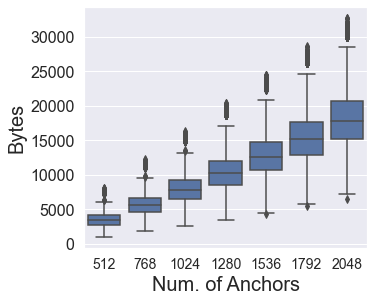

In [11]:
plt.figure(figsize=(5, 4))

ax = sns.boxplot(data=df, x='n_anchors', y='bytes_float4', color='b')
# sns.lineplot(data=df['n_anchors'].unique().astype(np.int), marker='o', markersize=10)


ax.set_xlabel('Num. of Anchors', fontsize=20)
ax.set_ylabel('Bytes', fontsize=20)

ax.set_xticklabels([512 + 256 * i for i in range(7)], size=14)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=1).astype(np.int), size=16)

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/bytes_float4.pdf')  

In [12]:
df.query('n_anchors == 1280')

,n_anchors,data_idx,empty_anchors,non_empty_anchors,bytes_float4
6111,1280,0,662,618,9888
6112,1280,1,712,568,9088
6113,1280,2,535,745,11920
6114,1280,3,546,734,11744
6115,1280,4,792,488,7808
...,...,...,...,...,...
8143,1280,2032,757,523,8368
8144,1280,2033,669,611,9776
8145,1280,2034,737,543,8688
8146,1280,2035,542,738,11808


<ipython-input-13-5ce921756e65>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.around(ax.get_xticks(), decimals=1).astype(np.int), size=14)
<ipython-input-13-5ce921756e65>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2), size=16)


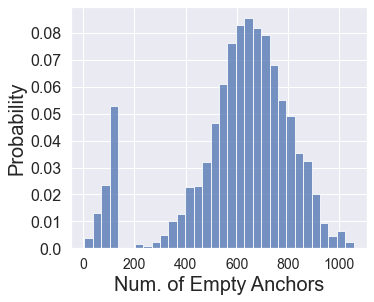

In [13]:
plt.figure(figsize=(5, 4))

ax = sns.histplot(data=df.query('n_anchors == 1280')['empty_anchors'], stat='probability')

ax.set_xlabel('Num. of Empty Anchors', fontsize=20)
ax.set_ylabel('Probability', fontsize=20)

ax.set_xticklabels(np.around(ax.get_xticks(), decimals=1).astype(np.int), size=14)
ax.set_yticklabels(np.around(ax.get_yticks(), decimals=2), size=16)

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/empty_anchors_distribution.pdf')  

In [ ]:
# plt.figure(figsize=(5, 5))

ax = sns.boxplot(x=empty_count * 16)

ax.set_xlabel('Bytes Reduced', fontsize=20)
# ax.set_ylabel('Probability', fontsize=16)

plt.tight_layout(pad=0)
plt.savefig(f'{WORKING_DIR}/figures/bytes_reduced.pdf')  

In [32]:
pd.Series(non_empty_count).describe()

count    2037.000000
mean      607.229750
std       212.706489
min         4.000000
25%       530.000000
50%       642.000000
75%       744.000000
max      1058.000000
dtype: float64

In [33]:
np.save(f'{WORKING_DIR}/non_empty_count', non_empty_count)